In [1]:
# This document demonstrates my ability to use different libraries, mainly pandas, for data manipulation.

In [2]:
# Ingest data from csv
import timeit; import numpy as np; import pandas as pd  # Import libraries

df = pd.read_csv(
    "assets/Business_employment_data.csv", index_col=0
)  # Read csv into a dataframe
df.head()  # Display outputs

,series_reference,region_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
period,,,,,,,,,,
2020.09,BDCQ.SED1RA,Northland,65520,65904,384,0.6,953,959,6,0.6
2020.09,BDCQ.SED1RB,Auckland,708372,714506,6134,0.9,12420,12530,110,0.9
2020.09,BDCQ.SED1RC,Waikato,198776,200265,1489,0.7,3041,3058,17,0.6
2020.09,BDCQ.SED1RD,Bay of Plenty,127323,128540,1217,1.0,1881,1899,18,1.0
2020.09,BDCQ.SED1RE,Gisborne,20417,20632,215,1.1,276,279,3,1.1


In [3]:
# Group by region name and calculate the average filled jobs and total earnings
grouped_df = df.groupby('region_name').agg({'filled jobs': 'mean', 'total_earnings': 'mean'})
grouped_df.head()

,filled jobs,total_earnings
region_name,,
Auckland,729008.1,13546.0
Bay of Plenty,134041.7,2084.3
Canterbury,284611.6,4560.1
Gisborne,21508.8,301.9
Hawke's Bay,76058.9,1148.3


In [4]:
# Sort by average filled jobs in descending order
sorted_df = grouped_df.sort_values(by='filled jobs', ascending=False)
sorted_df.head()

,filled jobs,total_earnings
region_name,,
Auckland,729008.1,13546.0
Canterbury,284611.6,4560.1
Wellington,243926.7,4661.9
Waikato,208021.1,3330.3
Bay of Plenty,134041.7,2084.3


In [5]:
# Print the top 5 regions with the highest average filled jobs and total earnings
top_regions = sorted_df.head(5)
print(top_regions)

               filled jobs  total_earnings
region_name                               
Auckland          729008.1         13546.0
Canterbury        284611.6          4560.1
Wellington        243926.7          4661.9
Waikato           208021.1          3330.3
Bay of Plenty     134041.7          2084.3


In [6]:
# Filter the DataFrame based on the given series reference and region name
filtered_df = df[(df['series_reference'] == 'BDCQ.SED1RB') & (df['region_name'] == 'Auckland')]
filtered_df.head()  # Display outputs

,series_reference,region_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
period,,,,,,,,,,
2020.09,BDCQ.SED1RB,Auckland,708372,714506,6134,0.9,12420,12530,110,0.9
2020.12,BDCQ.SED1RB,Auckland,713636,721492,7856,1.1,12597,12738,141,1.1
2021.03,BDCQ.SED1RB,Auckland,708896,715771,6875,1.0,12466,12586,120,1.0
2021.06,BDCQ.SED1RB,Auckland,720874,729746,8872,1.2,12972,13136,164,1.3
2021.09,BDCQ.SED1RB,Auckland,725395,734238,8843,1.2,13299,13457,158,1.2


In [7]:
# Calculate the difference and percentage difference for filled jobs and total earnings
filtered_df['filled_jobs_diff'] = filtered_df['filled jobs revised'] - filtered_df['filled jobs']
filtered_df['filled_jobs_pct_diff'] = (filtered_df['filled_jobs_diff'] / filtered_df['filled jobs']) * 100
filtered_df['earnings_diff'] = filtered_df['total earnings revised'] - filtered_df['total_earnings']
filtered_df['earnings_pct_diff'] = (filtered_df['earnings_diff'] / filtered_df['total_earnings']) * 100
print(filtered_df)

        series_reference region_name  filled jobs  filled jobs revised  \
period                                                                   
2020.09      BDCQ.SED1RB    Auckland       708372               714506   
2020.12      BDCQ.SED1RB    Auckland       713636               721492   
2021.03      BDCQ.SED1RB    Auckland       708896               715771   
2021.06      BDCQ.SED1RB    Auckland       720874               729746   
2021.09      BDCQ.SED1RB    Auckland       725395               734238   
2021.12      BDCQ.SED1RB    Auckland       741145               748627   
2022.03      BDCQ.SED1RB    Auckland       735186               741891   
2022.06      BDCQ.SED1RB    Auckland       738297               747141   
2022.09      BDCQ.SED1RB    Auckland       741564               749147   
2022.12      BDCQ.SED1RB    Auckland       756716               765991   

         filled jobs diff  filled jobs % diff  total_earnings  \
period                                        

In [8]:
# Write functions to manipulate data
new_df = df.drop(
    ["earnings % diff",
        "earnings diff",
        "total_earnings",
        "filled jobs % diff",
        "filled jobs",
        "filled jobs diff",],
    axis="columns",)  # Remove unnecessary columns
new_df = new_df.rename(mapper=str.strip, axis="columns")  # Data cleaning: remove whitespace
new_df.head()  # Display the renamed dataFrame

,series_reference,region_name,filled jobs revised,total earnings revised
period,,,,
2020.09,BDCQ.SED1RA,Northland,65904,959
2020.09,BDCQ.SED1RB,Auckland,714506,12530
2020.09,BDCQ.SED1RC,Waikato,200265,3058
2020.09,BDCQ.SED1RD,Bay of Plenty,128540,1899
2020.09,BDCQ.SED1RE,Gisborne,20632,279


In [9]:
new_df["period"] = (new_df.index)  # Copy the previous indexed data
new_df = new_df.set_index("region_name")  # Set index of the column to region_name
new_df.head()  # Display outputs

,series_reference,filled jobs revised,total earnings revised,period
region_name,,,,
Northland,BDCQ.SED1RA,65904,959,2020.09
Auckland,BDCQ.SED1RB,714506,12530,2020.09
Waikato,BDCQ.SED1RC,200265,3058,2020.09
Bay of Plenty,BDCQ.SED1RD,128540,1899,2020.09
Gisborne,BDCQ.SED1RE,20632,279,2020.09


In [10]:
new_df = new_df[new_df["period"] == 2022.12]  # Where the 'period' column has a value of 2022.12
new_df.loc[[("Northland"), ("Gisborne")]]  # List two regions to compare their data

,series_reference,filled jobs revised,total earnings revised,period
region_name,,,,
Northland,BDCQ.SED1RA,72801,1181,2022.12
Gisborne,BDCQ.SED1RE,22440,338,2022.12


In [11]:
type(new_df.loc["Northland"])  # Check the data type of the return

pandas.core.series.Series

In [12]:
new_df["series_reference"].unique()  # Retrieve all the unique values

array(['BDCQ.SED1RA', 'BDCQ.SED1RB', 'BDCQ.SED1RC', 'BDCQ.SED1RD',
       'BDCQ.SED1RE', 'BDCQ.SED1RF', 'BDCQ.SED1RG', 'BDCQ.SED1RH',
       'BDCQ.SED1RI', 'BDCQ.SED1RJ', 'BDCQ.SED1RK', 'BDCQ.SED1RL',
       'BDCQ.SED1RM', 'BDCQ.SED1RN', 'BDCQ.SED1RO', 'BDCQ.SED1RP'],
      dtype=object)

In [13]:
(new_df.where(new_df["series_reference"] == "BDCQ.SED1RA")  # Use Method Chaining
    .dropna()  # Drop any rows with missing values
    .set_index(["total earnings revised", "filled jobs revised"])  # Set new index 
)  #  Close chaining

,,series_reference,period
total earnings revised,filled jobs revised,,
1181.0,72801.0,BDCQ.SED1RA,2022.12


In [14]:
def my_approach():  # Define a function
    global df
    new_df = df[df["series_reference"] == "BDCQ.SED1RA"]
    new_df.set_index(["total earnings revised", "filled jobs revised"], inplace=True)
    return new_df.rename(
        columns={"total earnings revised": "total_earnings_revised","filled jobs revised": "filled_jobs_revised",})
timeit.timeit(my_approach, number=1)  # Measure the execution time

0.00249553844332695

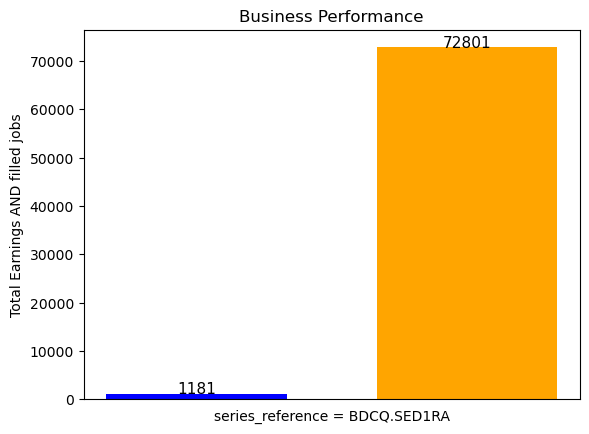

In [15]:
# Visualiza Data
import matplotlib.pyplot as plt;# Import library
column1_data = new_df.loc[new_df["series_reference"] == "BDCQ.SED1RA", 'total earnings revised'].values.astype(float) # Extract the data for the first column
column2_data = new_df.loc[new_df["series_reference"] == "BDCQ.SED1RA", 'filled jobs revised'].values.astype(float)  # Extract the data for the second column

sr = ["series_reference"] #Create the x-axis values
xvals = np.arange(len(sr))
new_xvals = xvals + 0.15  # Add a small offset to new_xvals to shift the bars

# Now, let's create the bars
bars1 = plt.bar(xvals, column1_data, width=0.1, color="blue", align="center") # Create the first set of bars
bars2 = plt.bar(new_xvals, column2_data, width=0.1, color="orange", align="center") # Create the second set of bars

for bar in bars1: # Add text labels to the first set of bars
    height = bar.get_height()
    if not np.isnan(height):
        plt.gca().text(bar.get_x() + bar.get_width() / 2, height - 5, str(int(height)), ha="center", color="black", fontsize=11)

for bar in bars2: # Add text labels to the second set of bars
    height = bar.get_height()
    if not np.isnan(height):
        plt.gca().text(bar.get_x() + bar.get_width() / 2, height - 5, str(int(height)), ha="center", color="black", fontsize=11)

plt.xlabel("series_reference = BDCQ.SED1RA") # Add x-axis label
plt.ylabel("Total Earnings AND filled jobs") # Add y-axis label
plt.title("Business Performance") # Add a title to the plot
plt.xticks([], []) # Hide the x-axis tick labels
plt.show() # Display the plot

In [16]:
# Thank you for sparing your valuable time.
# Data download from https://www.stats.govt.nz/large-datasets/csv-files-for-download/